In [45]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Load dataset
X_orig, y_orig = load_svmlight_file('data/housing_scale')
# data from https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression.html#housing

# Divide dataset
X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(X_orig, y_orig, test_size=0.2)

# Convert to column vector
X_train = X_train_orig.T.toarray()
X_val = X_val_orig.T.toarray()
y_train = np.reshape(y_train_orig, (1, y_train_orig.shape[0]))
y_val = np.reshape(y_val_orig, (1, y_val_orig.shape[0]))
print(X_train.shape, y_train.shape)

(13, 404) (1, 404)


In [47]:
# 用零初始化参数
def init_parameters_with_zeros(dim):
    W = np.zeros((dim, 1))
    b = 0
    return W, b

# propagate

forward propagate:
$$A = W^TX+b$$
cost function:
$$ J(W,b) = \frac{1}m\sum_{i=1}^m(y_i-(W^Tx_i+b))^2 $$
gradient:
// $$ g_w = X*(A-Y).T $$

In [48]:
# 前向传播和反向传播
def propagate(W, b, X, Y):
    m = X.shape[1]

    # forward propagate
    A = np.dot(W.T, X) + b
    # compute cost
    cost = np.sum(np.square(A - Y)) / (2*m)
    # propagate
    gW = np.dot(X, (A - Y).T)/ m
    gb = np.sum(A - Y) / m
    return cost, gW, gb

In [49]:
def model(X_train, Y_train, X_val, Y_val, num_iterations=500, learning_rate=0.01, print_cost=False):

    # 保存训练集和验证集上的cost
    train_cost_log = []
    val_cost_log = []

    # 初始化参数
    W, b = init_parameters_with_zeros(X_train.shape[0])

    for i in range(num_iterations):
        # 进行前向传播、反向传播，计算cost和梯度
        train_cost, gW, gb = propagate(W, b, X_train, Y_train)
        # 计算验证集上的cost
        val_cost, _, _ = propagate(W, b, X_val, Y_val)

        # 保存cost
        train_cost_log.append(train_cost)
        val_cost_log.append(val_cost)

        # 更新参数
        W = W - learning_rate * gW
        b = b - learning_rate * gb

        if print_cost and i % 100 == 0:
            print("After iteration %i, train cost: %f, val cost : %f" %
                  (i, train_cost, val_cost))

    return W, b, train_cost_log, val_cost_log

In [50]:
_, _, train_loss_log, val_loss_log = model(X_train, y_train, X_val, y_val, print_cost=True)

After iteration 0, train cost: 292.876040, val cost : 308.737745
After iteration 100, train cost: 27.466979, val cost : 39.703740
After iteration 200, train cost: 22.495342, val cost : 32.870234
After iteration 300, train cost: 19.164595, val cost : 28.114881
After iteration 400, train cost: 16.853118, val cost : 24.685679


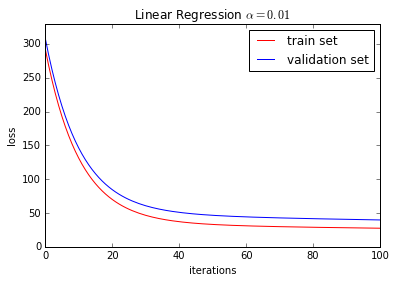

In [51]:
# 画图
plt.plot(train_loss_log, 'r', label='train set')
plt.plot(val_loss_log, 'b', label='validation set')

plt.legend()  # 图例
plt.axis([0, 100, 0, 330])
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title(r'Linear Regression $\alpha=0.01$')
# plt.show()
plt.savefig('linear_regression_loss.eps', format='eps', dpi=1000)

In [52]:
# _,_,_,loss_learning_rate_03 = model(X_train,y_train,X_val,y_val,learning_rate = 0.3)
_, _, _, loss_learning_rate_01 = model(X_train, y_train, X_val, y_val, learning_rate=0.1)
_, _, _, loss_learning_rate_003 = model(X_train, y_train, X_val, y_val, learning_rate=0.03)
_, _, _, loss_learning_rate_001 = model(X_train, y_train, X_val, y_val, learning_rate=0.01)
_, _, _, loss_learning_rate_0003 = model(X_train, y_train, X_val, y_val, learning_rate=0.003)
# _,_,_,loss_learning_rate_0001 = model(X_train,y_train,X_val,y_val,learning_rate = 0.001)
# _,_,_,loss_learning_rate_00003 = model(X_train,y_train,X_val,y_val,learning_rate = 0.0003)
# _,_,_,loss_learning_rate_00001 = model(X_train,y_train,X_val,y_val,learning_rate = 0.0001)

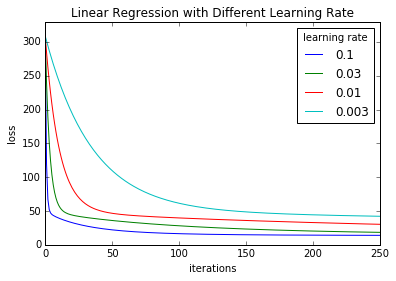

In [53]:
# plt.plot(loss_learning_rate_03, label='0.3')
plt.plot(loss_learning_rate_01, label='0.1')
plt.plot(loss_learning_rate_003, label='0.03')
plt.plot(loss_learning_rate_001, label='0.01')
plt.plot(loss_learning_rate_0003, label='0.003')
# plt.plot(loss_learning_rate_0001, label='0.001')
# plt.plot(loss_learning_rate_00003, label='0.0003')
# plt.plot(loss_learning_rate_00001, label='0.0001')

plt.legend(title='learning rate')
plt.axis([0, 250, 0, 330])
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title('Linear Regression with Different Learning Rate')
# plt.show()
plt.savefig('linear_regression_loss_with_different_learning_rate.eps', format='eps', dpi=1000)